In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

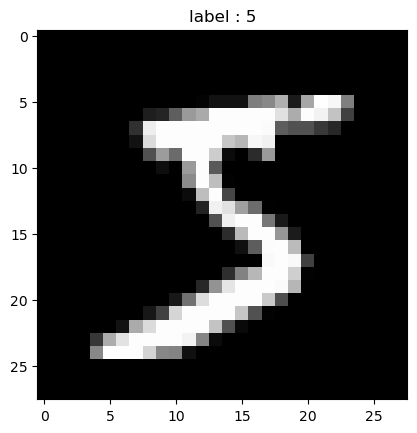

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

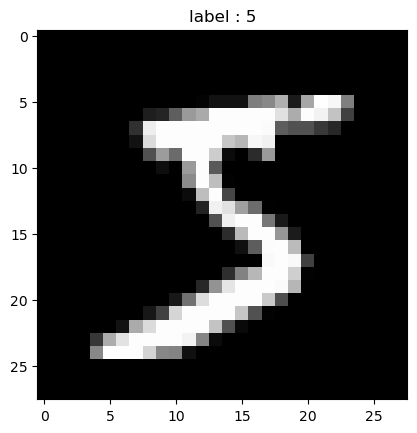

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [5]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')

plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

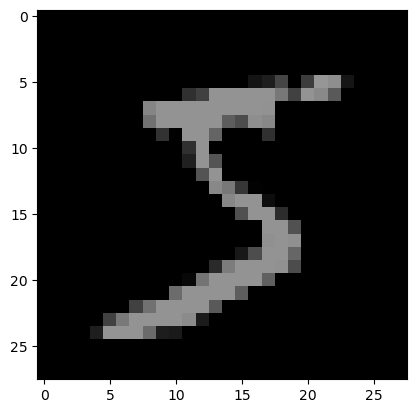

In [6]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [7]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)


(48000, 784)
(12000, 784)


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(48000,)
(48000, 10)
float64


C:\Users\DoBUY\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
class GetMiniBatch:
    """
Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)


    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [11]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # You can get the 5th mini batch
for mini_X_train, mini_y_train in get_mini_batch:
    # You can use a mini batch in this for statement
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 9, 2, 5, 4, 5, 6, 7, 3, 5, 4, 0, 1, 5, 8, 6, 3, 7, 0, 7],
      dtype=uint8))


In [12]:
import numpy as np
import scipy

class ScratchSimpleNeuralNetrowkClassifier():
    def __init__(self, n_epochs=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=100, activate_function_key='tanh', lr=0.01, verbose=False):
        self.n_epoch = n_epochs
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activate_function_key = activate_function_key
        self.lr = lr
        self.verbose = verbose

    def initial_weight(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)

    def activation_function(self, X):
        if self.activate_function_key == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activate_function_key == 'tanh':
            return np.tanh(X)

    def softmax(self, X):
        return np.exp(X - np.max(X)) / np.sum(np.exp(X - np.max(X)), axis=1, keepdims=True)

    def loss_function(self, y, yt):
        delta =1e-7
        return -np.mean(yt*np.log(y+delta))


    def gradient_descent(self, X, y, yt):
        delta_a3 = (y - yt) / self.n_batch
        delta_b3 = np.sum(delta_a3, axis=0)
        delta_w3 = np.dot(self.z2.T, delta_a3)
        delta_z2 = np.dot(delta_a3, self.W3.T)

        self.W3 -= self.lr * delta_w3
        self.b3 -= self.lr * delta_b3

        # 2nd Layer
        if self.activate_function_key == 'sigmoid':
            delta_a2 = delta_z2 * (1 - self.activation_function_key(self.z2)) * self.activation_function(self.z2)
        elif self.activate_function_key == 'tanh':
            delta_a2 = delta_z2 * (1 - np.tanh(self.z2) ** 2)

        delta_b2 = np.sum(delta_a2, axis=0)
        delta_w2 = np.dot(self.z1.T, delta_a2)
        delta_z1 = np.dot(delta_a2, self.W2.T)

        self.W2 -= self.lr * delta_w2
        self.b2 -= self.lr * delta_b2

        # 1st Layer
        if self.activate_function_key == 'sigmoid':
            delta_a1 = delta_z1 * (1 - self.activation_function_key(self.z1)) * self.activation_function(self.z1)
        elif self.activate_function_key == 'tanh':
            delta_a1 = delta_z1 * (1 - np.tanh(self.z1) ** 2)

        delta_b1 = np.sum(delta_a1, axis=0)
        delta_w1 = np.dot(X.T, delta_a1)

        self.W1 -= self.lr * delta_w1
        self.b1 -= self.lr * delta_b1

    def fit(self, X, y, X_val=False, y_val=False):
        # initial weights
        self.initial_weight()

        # list to record the loss_function for each iteration
        self.log_loss = []
        self.log_loss_val = []

        # evaluate the estimation of train data per iteration: Accuracy
        self.log_acc = []
        self.log_acc_val = []

        for epoch in range(self.n_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            self.loss = 0
            self.true_y = np.array([])
            self.pred_y = np.array([])
            for mini_X_train, mini_y_train in get_mini_batch:
                # 1st layer
                self.z1 = self.activation_function(np.dot(mini_X_train, self.W1) + self.b1)
                # 2nd layer
                self.z2 = self.activation_function(np.dot(self.z1, self.W2) + self.b2)
                # 3rd layer
                output = self.softmax(np.dot(self.z2, self.W3) + self.b3)

                # Backpropagation
                self.gradient_descent(mini_X_train, output, mini_y_train)

                # record correct and estimated values for mini batch data
                self.true_y = np.concatenate([self.true_y, np.argmax(mini_y_train, axis=1)])
                self.pred_y = np.concatenate([self.pred_y, np.argmax(output, axis=1)])

                # loss function
                self.loss += self.loss_function(output, mini_y_train)

            # record the loss function for each iteration
            self.log_loss.append(self.loss / len(get_mini_batch))

            # Accuracy
            acc = accuracy_score(self.true_y, self.pred_y)
            self.log_acc.append(acc)

            # Calculate once val data has been entered
            if type(X_val) != bool:
                # 1st layer
                self.z1_val = self.activation_function(np.dot(X_val, self.W1) + self.b1)
                # 2nd layer
                self.z2_val = self.activation_function(np.dot(self.z1_val, self.W2) + self.b2)
                # 3rd layer
                output_val = self.softmax(np.dot(self.z2_val, self.W3) + self.b3)
                # loss function
                self.loss_val = self.loss_function(output_val, y_val)
                self.log_loss_val.append(self.loss_val)

                # Accuracy
                acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(output_val, axis=1))
                self.log_acc_val.append(acc_val)

            if self.verbose:
                print('epoch:{:>3} loss:{:>8,.3f}'.format(epoch, self.loss / self.n_batch, acc))

    def predict(self, X):
        # 1st layer
        self.pred_z1 = self.activation_function(np.dot(X, self.W1) + self.b1)
        # 2nd layer
        self.pred_z2 = self.activation_function(np.dot(self.pred_z1, self.W2) + self.b2)
        return np.argmax(np.dot(self.pred_z2, self.W3) + self.b3, axis=1)


In [13]:
#problem 1


n_features = 784
n_nodes1 = 400
n_nodes2 = 200
n_output = 10

sigma = 0.01
W1 = sigma * np.random.randn(n_features, n_nodes1)
print("W1 shape:", W1.shape)  # (784, 400)



W1 shape: (784, 400)


In [14]:
W1 = sigma*np.random.randn(n_features, n_nodes1)
b1 = sigma * np.random.randn(n_nodes1)
W2 = sigma*np.random.randn(n_nodes1, n_nodes2)
b2 = sigma * np.random.randn(n_nodes2)
W3 = sigma*np.random.randn(n_nodes2, n_output)
b3 = sigma * np.random.randn(n_output)

print('W1', W1.shape)
print('W2', W2.shape)
print('W3', W3.shape)
print('b1', b1.shape)
print('b2', b2.shape)
print('b3', b3.shape)

W1 (784, 400)
W2 (400, 200)
W3 (200, 10)
b1 (400,)
b2 (200,)
b3 (10,)


In [15]:
#problem 2
X=X_train[0:20]

In [16]:
z1= np.dot(X,W1)
print('z1.shape', z1.shape)
print(z1)

z1.shape (20, 400)
[[-0.02796901  0.06792584 -0.04131837 ... -0.04342044  0.11254567
  -0.14099494]
 [-0.00832078 -0.04523414  0.07308972 ...  0.0238416   0.0743399
  -0.07613511]
 [-0.06424519  0.04235851 -0.05982183 ... -0.04309733  0.11200228
  -0.02589564]
 ...
 [-0.07212137  0.06551796  0.10055596 ...  0.00106716  0.06520867
  -0.15439984]
 [ 0.01904279  0.13519309 -0.03281431 ...  0.08738136  0.04434949
  -0.07197812]
 [-0.08402737  0.08284957  0.01589345 ...  0.01954893  0.0622956
  -0.03100079]]


In [17]:
sig1 = 1/(1+np.exp(-z1))
print('sig1:', sig1.shape)

sig1: (20, 400)


In [18]:
z2= np.dot(sig1,W2) + b2
print('z1.shape', z2.shape)
print(z2)


z1.shape (20, 200)
[[-0.06543369  0.08210391 -0.05557289 ... -0.06771032  0.03430869
   0.03893442]
 [-0.06386142  0.07864637 -0.05379758 ... -0.07170035  0.04254965
   0.03778753]
 [-0.06066158  0.07677612 -0.0481176  ... -0.07057711  0.03486299
   0.03373662]
 ...
 [-0.06167057  0.07462847 -0.05770719 ... -0.06843354  0.04075896
   0.03896886]
 [-0.0688221   0.08034954 -0.05532053 ... -0.06217271  0.03575475
   0.04061609]
 [-0.06352962  0.08034052 -0.05620179 ... -0.06519506  0.0387043
   0.03471972]]


In [19]:
sig2 = 1/(1+np.exp(-z2))
print('sig2', sig2.shape)
print(sig2)


sig2 (20, 200)
[[0.48364741 0.52051446 0.48611035 ... 0.48307888 0.50857633 0.50973237]
 [0.48404007 0.51965146 0.48655385 ... 0.48208259 0.51063581 0.50944576]
 [0.48483925 0.51918461 0.48797292 ... 0.48236304 0.50871487 0.50843336]
 ...
 [0.48458724 0.51864846 0.4855772  ... 0.48289829 0.51018833 0.50974098]
 [0.48280126 0.52007658 0.48617339 ... 0.48446183 0.50893773 0.51015263]
 [0.48412294 0.52007433 0.48595325 ... 0.483707   0.50967487 0.50867906]]


In [20]:
z3 = np.dot(sig2, W3) + b3
print('z3.shape', z3.shape)
print(z3)

z3.shape (20, 10)
[[-0.03829266 -0.07032655 -0.02093055  0.06662813  0.15797754 -0.22305122
   0.00594041 -0.02605545  0.05383831 -0.13210966]
 [-0.03824126 -0.07068525 -0.02084136  0.06659167  0.15821527 -0.22300712
   0.00581149 -0.02616142  0.05369383 -0.13222832]
 [-0.03834916 -0.07042499 -0.0206394   0.06678168  0.15807839 -0.2231322
   0.00592676 -0.02616626  0.05380263 -0.13214929]
 [-0.03829562 -0.07048987 -0.02072997  0.0668573   0.15819932 -0.22313986
   0.00604685 -0.0260882   0.05386047 -0.1323123 ]
 [-0.03838014 -0.07043258 -0.0208568   0.06668325  0.15805571 -0.22304048
   0.005825   -0.02619893  0.05387715 -0.13217802]
 [-0.03812292 -0.07032485 -0.02070366  0.06673492  0.15801542 -0.22299481
   0.00570408 -0.02625799  0.05392377 -0.13203253]
 [-0.03838829 -0.0705888  -0.02086411  0.06675966  0.15812821 -0.223032
   0.00608981 -0.02614905  0.05379021 -0.1322002 ]
 [-0.03841956 -0.07050857 -0.02075278  0.06690787  0.15791962 -0.22292771
   0.00598334 -0.0263131   0.0537270

In [21]:
sfmax = np.zeros([len(X),10])
for i in range(20):
    sfmax[i] = np.exp(z3[i])/np.sum(np.exp(z3[i]), axis =0)
    print('sfmax.shape', sfmax.shape)
    print(sfmax)
    print(np.sum(sfmax))

sfmax.shape (20, 10)
[[0.09795023 0.09486222 0.0996657  0.10878574 0.11919129 0.08142651
  0.10238012 0.09915623 0.10740325 0.08917872]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.    

In [22]:
softmax = np.exp(z3)/np.sum(np.exp(z3), axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.09795023 0.09486222 0.0996657  0.10878574 0.11919129 0.08142651
  0.10238012 0.09915623 0.10740325 0.08917872]
 [0.09795937 0.09483218 0.09967877 0.10878633 0.11922463 0.08143352
  0.10237121 0.09914988 0.10739224 0.08917188]
 [0.09794307 0.09485132 0.09969307 0.10880064 0.11920134 0.08141857
  0.10237703 0.0991436  0.10739764 0.08917371]
 [0.09794599 0.09484291 0.09968167 0.10880628 0.11921292 0.08141601
  0.10238689 0.09914898 0.1074013  0.08915706]
 [0.09794392 0.09485435 0.09967535 0.10879424 0.11920335 0.08142926
  0.10237066 0.09914429 0.1074099  0.08917468]
 [0.09796373 0.09485936 0.09968513 0.10879388 0.119192   0.0814285
  0.10235266 0.09913298 0.107409   0.08918275]
 [0.09794096 0.09483745 0.09967242 0.10880016 0.11920937 0.08142816
  0.10239552 0.09914705 0.10739819 0.08917074]
 [0.09794013 0.09484722 0.09968579 0.10881876 0.11918722 0.08143851
  0.10238695 0.09913304 0.10739385 0.08916854]
 [0.09795767 0.09485287 0.09967957 0.1088     0.11918957 0

In [23]:
softmax = np.exp(z3).T/np.sum(np.exp(z3), axis=1)
print('softmax.shape', softmax.shape)
print(softmax.T)
print(np.sum(softmax))

softmax.shape (10, 20)
[[0.09795023 0.09486222 0.0996657  0.10878574 0.11919129 0.08142651
  0.10238012 0.09915623 0.10740325 0.08917872]
 [0.09795937 0.09483218 0.09967877 0.10878633 0.11922463 0.08143352
  0.10237121 0.09914988 0.10739224 0.08917188]
 [0.09794307 0.09485132 0.09969307 0.10880064 0.11920134 0.08141857
  0.10237703 0.0991436  0.10739764 0.08917371]
 [0.09794599 0.09484291 0.09968167 0.10880628 0.11921292 0.08141601
  0.10238689 0.09914898 0.1074013  0.08915706]
 [0.09794392 0.09485435 0.09967535 0.10879424 0.11920335 0.08142926
  0.10237066 0.09914429 0.1074099  0.08917468]
 [0.09796373 0.09485936 0.09968513 0.10879388 0.119192   0.0814285
  0.10235266 0.09913298 0.107409   0.08918275]
 [0.09794096 0.09483745 0.09967242 0.10880016 0.11920937 0.08142816
  0.10239552 0.09914705 0.10739819 0.08917074]
 [0.09794013 0.09484722 0.09968579 0.10881876 0.11918722 0.08143851
  0.10238695 0.09913304 0.10739385 0.08916854]
 [0.09795767 0.09485287 0.09967957 0.1088     0.11918957 0

In [24]:
softmax = np.exp(z3)/np.sum(np.exp(z3),axis=1, keepdims=True)
print('softmax.shape', softmax.shape)
print(softmax)
print(np.sum(softmax))

softmax.shape (20, 10)
[[0.09795023 0.09486222 0.0996657  0.10878574 0.11919129 0.08142651
  0.10238012 0.09915623 0.10740325 0.08917872]
 [0.09795937 0.09483218 0.09967877 0.10878633 0.11922463 0.08143352
  0.10237121 0.09914988 0.10739224 0.08917188]
 [0.09794307 0.09485132 0.09969307 0.10880064 0.11920134 0.08141857
  0.10237703 0.0991436  0.10739764 0.08917371]
 [0.09794599 0.09484291 0.09968167 0.10880628 0.11921292 0.08141601
  0.10238689 0.09914898 0.1074013  0.08915706]
 [0.09794392 0.09485435 0.09967535 0.10879424 0.11920335 0.08142926
  0.10237066 0.09914429 0.1074099  0.08917468]
 [0.09796373 0.09485936 0.09968513 0.10879388 0.119192   0.0814285
  0.10235266 0.09913298 0.107409   0.08918275]
 [0.09794096 0.09483745 0.09967242 0.10880016 0.11920937 0.08142816
  0.10239552 0.09914705 0.10739819 0.08917074]
 [0.09794013 0.09484722 0.09968579 0.10881876 0.11918722 0.08143851
  0.10238695 0.09913304 0.10739385 0.08916854]
 [0.09795767 0.09485287 0.09967957 0.1088     0.11918957 0

In [25]:
np.tanh(z1)

array([[-0.02796172,  0.06782156, -0.04129487, ..., -0.04339317,
         0.11207288, -0.140068  ],
       [-0.00832059, -0.04520331,  0.07295984, ...,  0.02383708,
         0.07420325, -0.07598834],
       [-0.06415694,  0.04233319, -0.05975057, ..., -0.04307066,
         0.11153628, -0.02588985],
       ...,
       [-0.07199658,  0.06542438,  0.10021841, ...,  0.00106716,
         0.0651164 , -0.1531845 ],
       [ 0.01904049,  0.13437542, -0.03280254, ...,  0.08715964,
         0.04432044, -0.07185408],
       [-0.08383016,  0.08266052,  0.01589211, ...,  0.01954644,
         0.06221514, -0.03099086]])

In [26]:
(np.exp(z1) * np.exp(-z1)) / (np.exp(z1) + np.exp(-z1))


array([[0.4998045 , 0.49884873, 0.4995735 , ..., 0.49952904, 0.49684999,
        0.49507094],
       [0.49998269, 0.4994889 , 0.49866744, ..., 0.49985793, 0.49862157,
        0.49855435],
       [0.49896991, 0.49955177, 0.49910667, ..., 0.49953601, 0.49688018,
        0.4998324 ],
       ...,
       [0.49870244, 0.49892877, 0.49748273, ..., 0.49999972, 0.49893884,
        0.4940988 ],
       [0.49990936, 0.49546525, 0.49973093, ..., 0.49809718, 0.49950868,
        0.49870758],
       [0.49824003, 0.49828888, 0.49993686, ..., 0.49990448, 0.49903138,
        0.49975983]])

In [27]:
#problem 3
y = y_train_one_hot[0:20]
loss = -y*np.log(sfmax)/len(y)
print('shape:\n', loss.shape)
print(loss)

shape:
 (20, 10)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.11155824 0.        ]
 [0.11616012 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.11777223 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.11090931 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11155515 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11556465 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.1115606  0.        ]
 [0.         0.1177744  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.11395179 0.         0.         0.        ]
 [0.         0.     

In [28]:
#problem 4

delta_a3 =sfmax-y
delta_b3 = np.sum(delta_a3, axis=0)
delta_W3 = np.dot(z2.T, delta_a3)
delta_z2 = np.dot(delta_a3, W3.T)


In [29]:
print(delta_a3.shape)
print(delta_b3.shape)
print(delta_W3.shape)
print(delta_z2.shape)

(20, 10)
(10,)
(200, 10)
(20, 200)


In [30]:
#2nd layer
delta_a2 = delta_z2 *(1-np.tanh(z2)**2)
delta_b2 = np.sum(delta_a2, axis=0)
delta_W2 = np.dot(z1.T, delta_a2)
delta_z1 = np.dot(delta_a2, W2.T)

In [31]:
print(delta_a2.shape)
print(delta_b2.shape)
print(delta_W2.shape)
print(delta_z1.shape)

(20, 200)
(200,)
(400, 200)
(20, 400)


In [32]:
#1st Layer
delta_a1 = delta_z2 *(1-np.tanh(z2)**2)
delta_b1 = np.sum(delta_a1, axis =0)
delta_W1 = np.dot(X.T, delta_a1)

In [33]:
print(delta_a1.shape)
print(delta_b1.shape)
print(delta_W1.shape)

(20, 200)
(200,)
(784, 200)


In [34]:
np.tanh(z1).shape

(20, 400)

In [35]:
clf = ScratchSimpleNeuralNetrowkClassifier(n_epochs=30, n_features=784,
                                           n_nodes1=400, n_nodes2=200, n_output=10,
                                           activate_function_key ='tanh',
                                           lr=0.01,n_batch=100, verbose = True)
clf.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)
y_pred = clf.predict(X_val)

epoch:  0 loss:   1.101
epoch:  1 loss:   1.073
epoch:  2 loss:   0.819
epoch:  3 loss:   0.499
epoch:  4 loss:   0.356
epoch:  5 loss:   0.293
epoch:  6 loss:   0.256
epoch:  7 loss:   0.231
epoch:  8 loss:   0.213
epoch:  9 loss:   0.200
epoch: 10 loss:   0.191
epoch: 11 loss:   0.183
epoch: 12 loss:   0.177
epoch: 13 loss:   0.172
epoch: 14 loss:   0.168
epoch: 15 loss:   0.164
epoch: 16 loss:   0.161
epoch: 17 loss:   0.158
epoch: 18 loss:   0.155
epoch: 19 loss:   0.152
epoch: 20 loss:   0.150
epoch: 21 loss:   0.148
epoch: 22 loss:   0.145
epoch: 23 loss:   0.143
epoch: 24 loss:   0.141
epoch: 25 loss:   0.138
epoch: 26 loss:   0.136
epoch: 27 loss:   0.134
epoch: 28 loss:   0.132
epoch: 29 loss:   0.130


In [36]:
print(y_pred)

[9 5 3 ... 2 9 6]


In [37]:
accuracy = accuracy_score(y_val, y_pred)

print('accuracy:{:.3f}'.format(accuracy))

accuracy:0.919


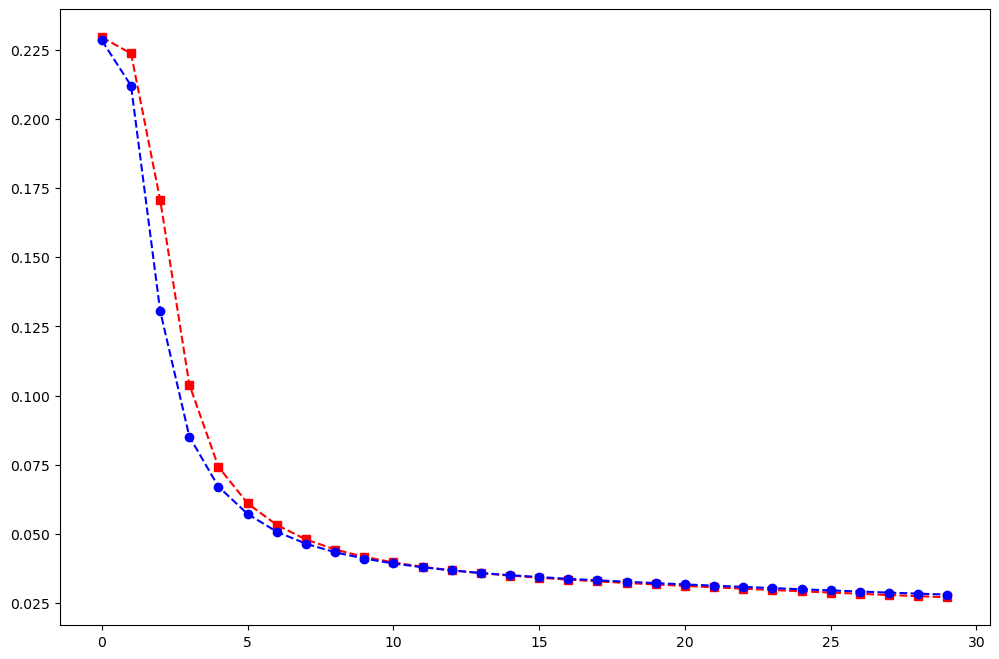

In [38]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams['font.size']=20

plt.plot(clf.log_loss, 'rs--')
plt.plot(clf.log_loss_val,'bo--');

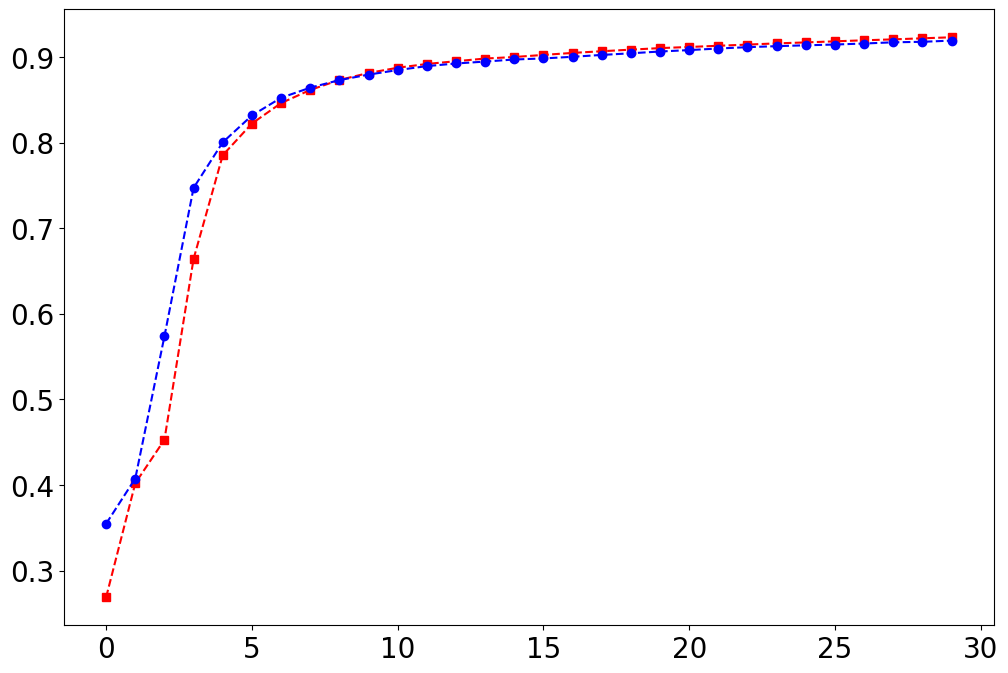

In [40]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams['font.size'] = 20

plt.plot(clf.log_acc, 'rs--')
plt.plot(clf.log_acc_val, 'bo--');